# Regression

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data & New Observation

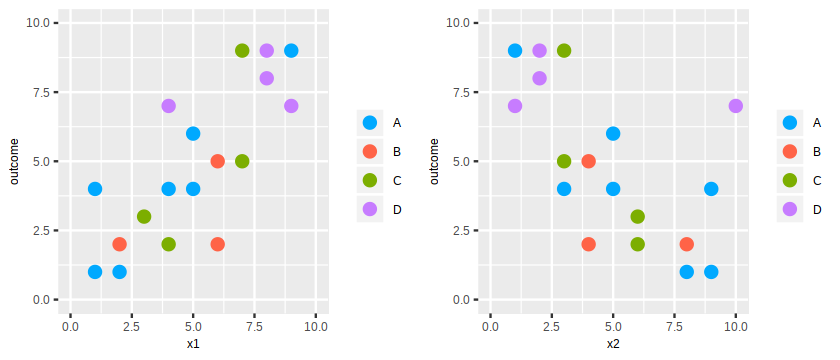

In [2]:
data = data.frame(x1=c(1,2,4,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9),
                  x2=c(9,8,6,3,5,4,3,2,1,9,8,6,1,5,4,3,2,10),
                  x3=c("A","A","C","A","A","B","C","D","A","A","B","C","D","A","B","C","D","D"),
                  outcome=c(1,1,2,4,4,2,5,9,9,4,2,3,7,6,5,9,8,7))

grid.arrange(ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x1, y=outcome, color=x3)),
             ggplot(data) + xlim(0,10) + ylim(0,10) + geom_point(aes(x=x2, y=outcome, color=x3)),
             nrow=1)

In [3]:
new = data.frame(x1=5.5, x2=7.5, x3=factor("B", c("A","B","C","D")))
fmt(new)

x1,x2,x3
5.5,7.5,B


## Problem 1: Dummy Variables

Express the data and new observation as all numeric variables.  Convert the categorical variables to dummy variables as required.

You may want to use these function(s):
* dummify()

In [4]:
data.dummify = dummify(data)
data.dummify = data.dummify[, colnames(data.dummify) != "x3A"]
data.dummify

x1,x2,x3B,x3C,x3D,outcome
1,9,0,0,0,1
2,8,0,0,0,1
4,6,0,1,0,2
4,3,0,0,0,4
5,5,0,0,0,4
6,4,1,0,0,2
7,3,0,1,0,5
8,2,0,0,1,9
9,1,0,0,0,9
1,9,0,0,0,4


In [5]:
new.dummify = dummify(new)
new.dummify = new.dummify[, colnames(new.dummify) != "x3A"]
new.dummify

x1,x2,x3B,x3C,x3D
5.5,7.5,1,0,0


## Problem 2: Simple Linear Regression

Construct a simple linear regression model to predict outcome given x1.<br>
Show the model intercept and coefficient(s).<br>
Show the predicted outcome of the new observation.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, overlaid on 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* predict()

,model.1.coefficients
(Intercept),0.6907363
x1,0.8304038


x1,x2,x3,outcome.predicted
5.5,7.5,B,5.257957


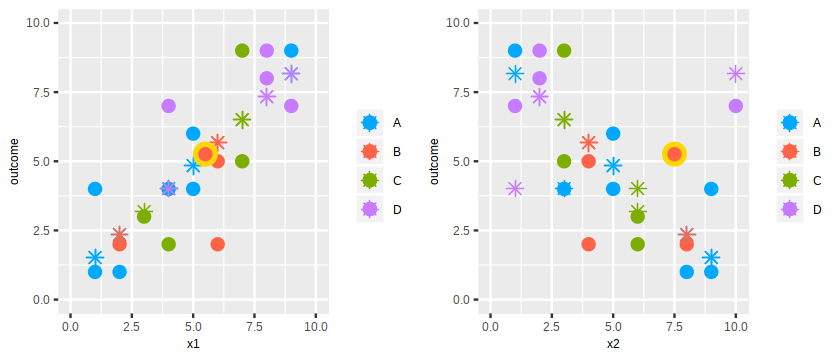

In [6]:
# Construct a simple linear regression model to predict outcome given x1
model = lm(outcome ~ x1, data.dummify)

# Show the model intercept and coefficient(s)
model.1.coefficients = model$coefficients
fmt(data.frame(model.1.coefficients), "", row.names=TRUE)

# Show the predicted outcome of the new observation
new$outcome.predicted = predict(model, new)
new

# Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, 
# overlaid on 2 scatterplots: outcome vs. x1, and outcome vs. x2
x1.plot = ggplot(data) + xlim(0,10) + ylim(0,10) + 
    geom_point(aes(x=x1, y=outcome, color=x3)) + 
    geom_point(aes(x=x1, y=predict(model, data), color=x3), shape=8) + 
    geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x1, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

x2.plot = ggplot(data) + xlim(0,10) + ylim(0,10) +
    geom_point(aes(x=x2, y=outcome, color=x3)) +
    geom_point(aes(x=x2, y=predict(model, data), color=x3), shape=8) +
    geom_point(aes(x=x2, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x2, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

grid.arrange(x1.plot, x2.plot, nrow=1)

## Problem 3: Multiple Linear Regression

Construct a multiple linear regression model to predict outcome given all other variables.<br>
Show the model intercept and coefficient(s).  Show the predicted outcome of the new observation. <br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* predict()

,model.2.coefficients
(Intercept),3.4418106
x1,0.5707866
x2,-0.2625978
x3B,-1.7049598
x3C,-0.5067502
x3D,1.1547282


x1,x2,x3,outcome.predicted
5.5,7.5,B,2.906694


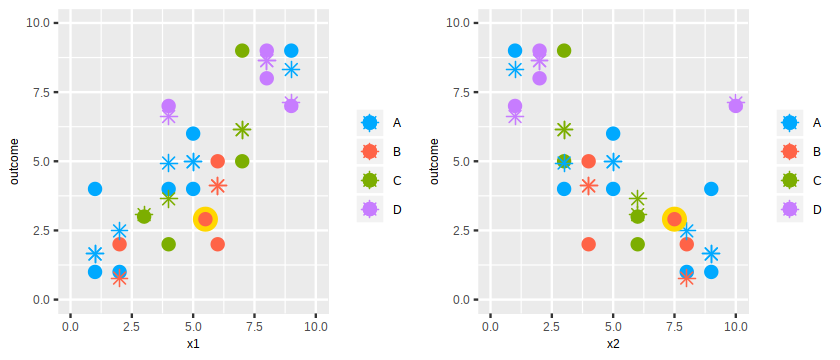

In [7]:
# Construct a multiple linear regression model to predict outcome given all other variables
model = lm(outcome ~ ., data.dummify)

# Show the model intercept and coefficient(s)
model.2.coefficients = model$coefficients
fmt(data.frame(model.2.coefficients), "", row.names=TRUE)

# Show the predicted outcome of the new observation
new$outcome.predicted = predict(model, new.dummify)
new

# Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, 
# overlaid on 2 scatterplots: outcome vs. x1, and outcome vs. x2
x1.plot = ggplot(data) + xlim(0,10) + ylim(0,10) + 
    geom_point(aes(x=x1, y=outcome, color=x3)) + 
    geom_point(aes(x=x1, y=predict(model, data.dummify), color=x3), shape=8) + 
    geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x1, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

x2.plot = ggplot(data) + xlim(0,10) + ylim(0,10) +
    geom_point(aes(x=x2, y=outcome, color=x3)) +
    geom_point(aes(x=x2, y=predict(model, data.dummify), color=x3), shape=8) +
    geom_point(aes(x=x2, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x2, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

grid.arrange(x1.plot, x2.plot, nrow=1)

## Problem 4: Complex Linear Regression

Construct a linear regression model to predict log outcome given 3rd degree polynomial in x1, 3rd degree polynomial in x2, log x1, log x2, and x3 (converted to dummy variables as required).<br>
Show the model intercept and coefficient(s).<br>
Show the predicted outcome (not predcited log outcome) of the new observation.<br>
Show the actual data, predicted outcomes (not predicted log outcomes) of the data, and predicted outcome (not predicted log outcome) of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* lm()
* poly()
* log()
* exp()
* predict()

,model.3.coefficients
(Intercept),-1.9051398
"poly(x1, 3, raw = TRUE)1",-1.7713011
"poly(x1, 3, raw = TRUE)2",0.2347395
"poly(x1, 3, raw = TRUE)3",-0.0101817
"poly(x2, 3, raw = TRUE)1",6.2509948
"poly(x2, 3, raw = TRUE)2",-0.8265711
"poly(x2, 3, raw = TRUE)3",0.0395150
log(x1),1.3664792
log(x2),-6.3567053
x3B,-0.2688865


x1,x2,x3,outcome.predicted
5.5,7.5,B,1.072841


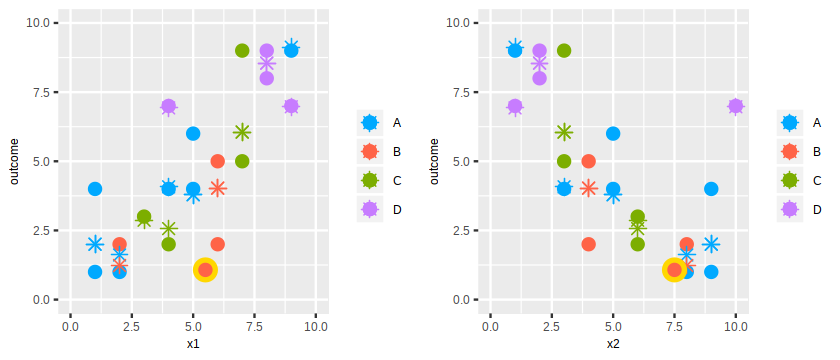

In [8]:
# Construct a linear regression model to predict log outcome given 3rd degree polynomial in x1, 
# 3rd degree polynomial in x2, log x1, log x2, and x3
model = lm(log(outcome) ~ poly(x1,3,raw=TRUE) + poly(x2,3,raw=TRUE) + log(x1) + log(x2) + x3B + 
           x3C + x3D, data.dummify)

# Show the model intercept and coefficient(s)
#Q: Significant digits are off?
model.3.coefficients = model$coefficients
fmt(data.frame(model.3.coefficients), "", row.names=TRUE)

# Show the predicted outcome (not predcited log outcome) of the new observation
new$outcome.predicted = exp(predict(model, new.dummify))
new

# Show the actual data, predicted outcomes (not predicted log outcomes) of the data, 
# and predicted outcome (not predicted log outcome) of the new observation, 
# as 2 scatterplots: outcome vs. x1, and outcome vs. x2
x1.plot = ggplot(data) + xlim(0,10) + ylim(0,10) + 
    geom_point(aes(x=x1, y=outcome, color=x3)) + 
    geom_point(aes(x=x1, y=exp(predict(model, data.dummify)), color=x3), shape=8) + 
    geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x1, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

x2.plot = ggplot(data) + xlim(0,10) + ylim(0,10) +
    geom_point(aes(x=x2, y=outcome, color=x3)) +
    geom_point(aes(x=x2, y=exp(predict(model, data.dummify)), color=x3), shape=8) +
    geom_point(aes(x=x2, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x2, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

grid.arrange(x1.plot, x2.plot, nrow=1)

## Problem 5: Support Vector Regression

Construct a regression model using the support vector machine method to predict outcome given all other variables.  To ensure consistent results, prefix with set.seed(12345).<br>
Use these hyper-parameter settings:<br>
* scale=TRUE
* type="eps-regression"
* kernel="radial"
* gamma=1
* cost=1

Show the predicted outcome of the new observation.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* set.seed()
* svm()
* predict()

x1,x2,x3,outcome.predicted
5.5,7.5,B,4.413205


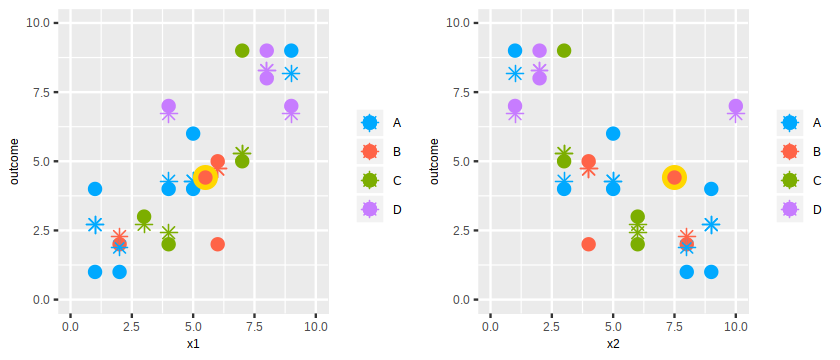

In [9]:
# Construct a regression model using the support vector machine method to predict outcome given all other
# variables. To ensure consistent results, prefix with set.seed(12345)
set.seed(12345)
model = svm(outcome ~ ., data, type="eps-regression", kernel="radial", gamma=1, scale=TRUE, cost=1)

# Show the predicted outcome of the new observation
new$outcome.predicted = predict(model, new)
new

# Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, 
# as 2 scatterplots: outcome vs. x1, and outcome vs. x2
x1.plot = ggplot(data) + xlim(0,10) + ylim(0,10) + 
    geom_point(aes(x=x1, y=outcome, color=x3)) + 
    geom_point(aes(x=x1, y=predict(model, data), color=x3), shape=8) + 
    geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x1, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

x2.plot = ggplot(data) + xlim(0,10) + ylim(0,10) +
    geom_point(aes(x=x2, y=outcome, color=x3)) +
    geom_point(aes(x=x2, y=predict(model, data), color=x3), shape=8) +
    geom_point(aes(x=x2, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x2, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

grid.arrange(x1.plot, x2.plot, nrow=1)

## Problem 6: Regression by Neural Network

Construct a regression model using the neural network method to predict outcome given all other variables. To ensure consistent results, prefix with set.seed(12345).<br>
Use these hyper-parameter settings:
* hidden=3
* algorithm="rprop+"
* rep=1
* act.fct="logistic"

Remember to use the regression form of the function.<br>
Show a diagram of the neural network with connections and weights.<br>
Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, as 2 scatterplots: outcome vs. x1, and outcome vs. x2.

You may want to use these function(s):
* set.seed()
* neuralnet()
* plot()
* as.vector()
* compute()

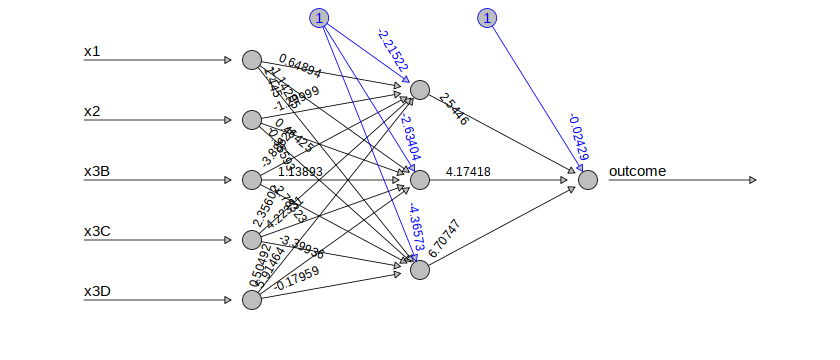

In [10]:
# Construct a regression model using the neural network method to predict outcome given all other variables 
# To ensure consistent results, prefix with set.seed(12345)
# Remember to use the regression form of the function
set.seed(12345)
model = neuralnet(outcome ~ ., data.dummify, hidden=3, algorithm="rprop+", act.fct="logistic", rep=1)

# Show a diagram of the neural network with connections and weights
plot(model, rep=1, fill="gray", cex=0.7, lwd=0.5, information=FALSE)

x1,x2,x3,outcome.predicted
5.5,7.5,B,0.9268674


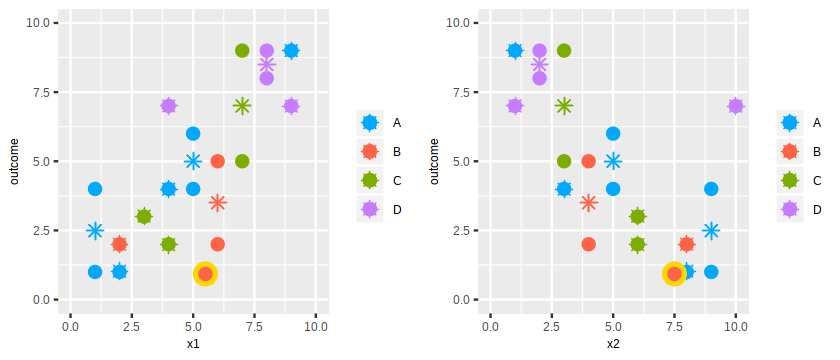

In [11]:
# Show the predicted outcome of the new observation
new$outcome.predicted = as.vector(compute(model, new.dummify, rep=1)$net.result)
new

# Show the actual data, predicted outcomes of the data, and predicted outcome of the new observation, 
# as 2 scatterplots: outcome vs. x1, and outcome vs. x2.
x1.plot = ggplot(data) + xlim(0,10) + ylim(0,10) + 
    geom_point(aes(x=x1, y=outcome, color=x3)) + 
    geom_point(aes(x=x1, y=as.vector(compute(model, data.dummify, rep=1)$net.result), color=x3), shape=8) + 
    geom_point(aes(x=x1, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x1, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

x2.plot = ggplot(data) + xlim(0,10) + ylim(0,10) +
    geom_point(aes(x=x2, y=outcome, color=x3)) +
    geom_point(aes(x=x2, y=as.vector(compute(model, data.dummify, rep=1)$net.result), color=x3), shape=8) +
    geom_point(aes(x=x2, y=outcome.predicted), data=new, color="gold", size=6) +
    geom_point(aes(x=x2, y=outcome.predicted, color=new$x3), data=new) + ylab("outcome")

grid.arrange(x1.plot, x2.plot, nrow=1)

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised April 12, 2020
</span>
</p>
</font>